# Task 2
_Juan Lopez-Martin_

jl5522@columbia.edu

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [222]:
df = pd.read_csv('housing.csv')
df = df.drop(labels = ['date'], axis = 1) # Drop date
df.drop_duplicates(keep="first", inplace=True)

### 2.1 Determine which features are continuous vs categorical. Drop rows without a valid sales price

Continuous:

In [223]:
con_features = df.describe(include=np.number)
con_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

Categorical:

In [224]:
cat_features = df.describe(include=np.object)
cat_features.columns

Index(['street', 'city', 'statezip', 'country'], dtype='object')

We remove the rows with price  = 0.

In [225]:
df = df.drop(df[df.price==0].index, axis = 0)

### 2.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target. Do you notice anything? Is there something that might require special treatment?

To get an idea about the distribution, we can plot a histogram it is a skewed one centered at below 500,000 and showing a long tail of very expensive houses. Note that the histogram only shows houses with a sale price of 2,500,000 , but there are more expensive ones.

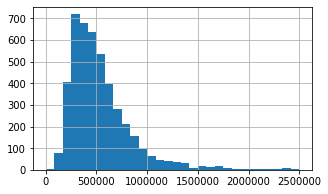

In [226]:
plt.rcParams["figure.figsize"] = (5,3)

df.price.hist(bins = 30, range=(0, 2500000))

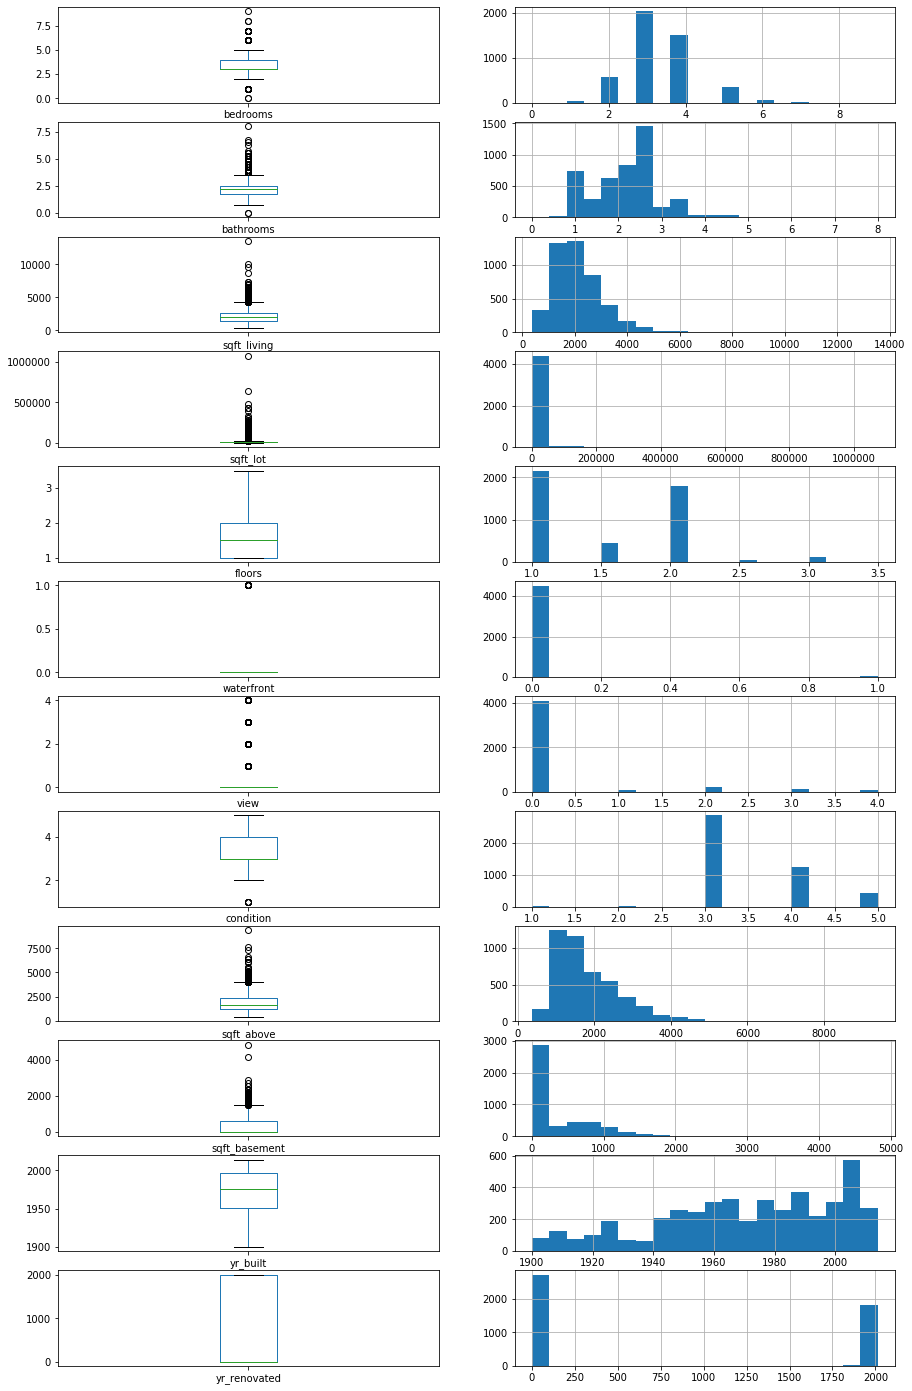

In [227]:
plt.rcParams["figure.figsize"] = (15,25)

fig, ax =  plt.subplots(len(con_features.columns)-1,2)

for i in range(0, len(con_features.columns)-1):
    df[con_features.columns[i+1]].plot.box(ax=ax[i,0])
    df[con_features.columns[i+1]].hist(ax=ax[i,1], bins = 20)

plt.show()

* Waterfront should be a categorical variable, but is coded as continuous. However, in this context this does not matter as it is coded as a dichotomous variable 1/0.
* Year renovated is also coded in a unusual format: it indicates the year the house has been renovated, or zero in case it has not been renovated -- this obviously does not mean that the house was renovated on year 0. It is possible that the price of a house built in the 1970 and the price of a house renovated in 1970 are relatively similar. To account for this fact, we calculate a new variable that correspond to the larger value between the yr_built and r_renovated columns for each row.
* A similar situation occurs with sqft_basement, in which zero indicates no basement. However, we will not change this variable as all the numbers are in the same measurement unit (sqft), while in the previous case not everything was in years (because zero meant no renovation and not year 0).  
* Price and both sqft appear to be log-normally distributed, and thus it could be more appropiate to take the logarithm to get  a normal distribution. However, we will leave these variables in the original scale for simplicity.

In [228]:
df['yr_max'] = df.loc[:,['yr_built', 'yr_renovated']].max(axis=1)

Regarding categorical variables, we decided to drop street (as it was too specific, with almost each house having its own street variable value) and country (because all the houses had the same country). The variables city and statezip probably overlap to a certain extent, but for now we are keeping both as they could contain relevant information for understanding the price of a house.

In [229]:
df.city.value_counts()[0:5]

Seattle     1561
Renton       291
Bellevue     281
Redmond      235
Kirkland     187
Name: city, dtype: int64

In [230]:
df.street.value_counts()[0:5]

2520 Mulberry Walk NE      4
2500 Mulberry Walk NE      3
12303 Sand Point Way NE    2
6520-6588 8th Ave NW       2
1149-1199 91st Ave NE      2
Name: street, dtype: int64

In [231]:
df.country.value_counts()[0:5]

USA    4551
Name: country, dtype: int64

In [232]:
df.statezip.value_counts()[0:5]

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    129
WA 98006    109
Name: statezip, dtype: int64

In [233]:
df = df.drop(labels = ['street'], axis = 1)
df = df.drop(labels = ['country'], axis = 1)

### 2.3 Visualize the dependency of the target on each continuous feature (2d scatter plot).

We plot a scatterplot and regression line for all the continuous features, adding some jitter and removing outliers for more clarity. It is important to highlight that we will remove these outliers for the rest of the analysis, with the theoretical justification that luxury apartments and mansions tend to follow different rules to the more general housing market (which is what we are interested in). However, this decision ultimately depends on the goals of the analysis.

In [234]:
# Remove outliers
df = df[df.price<5000000]
df1 = df

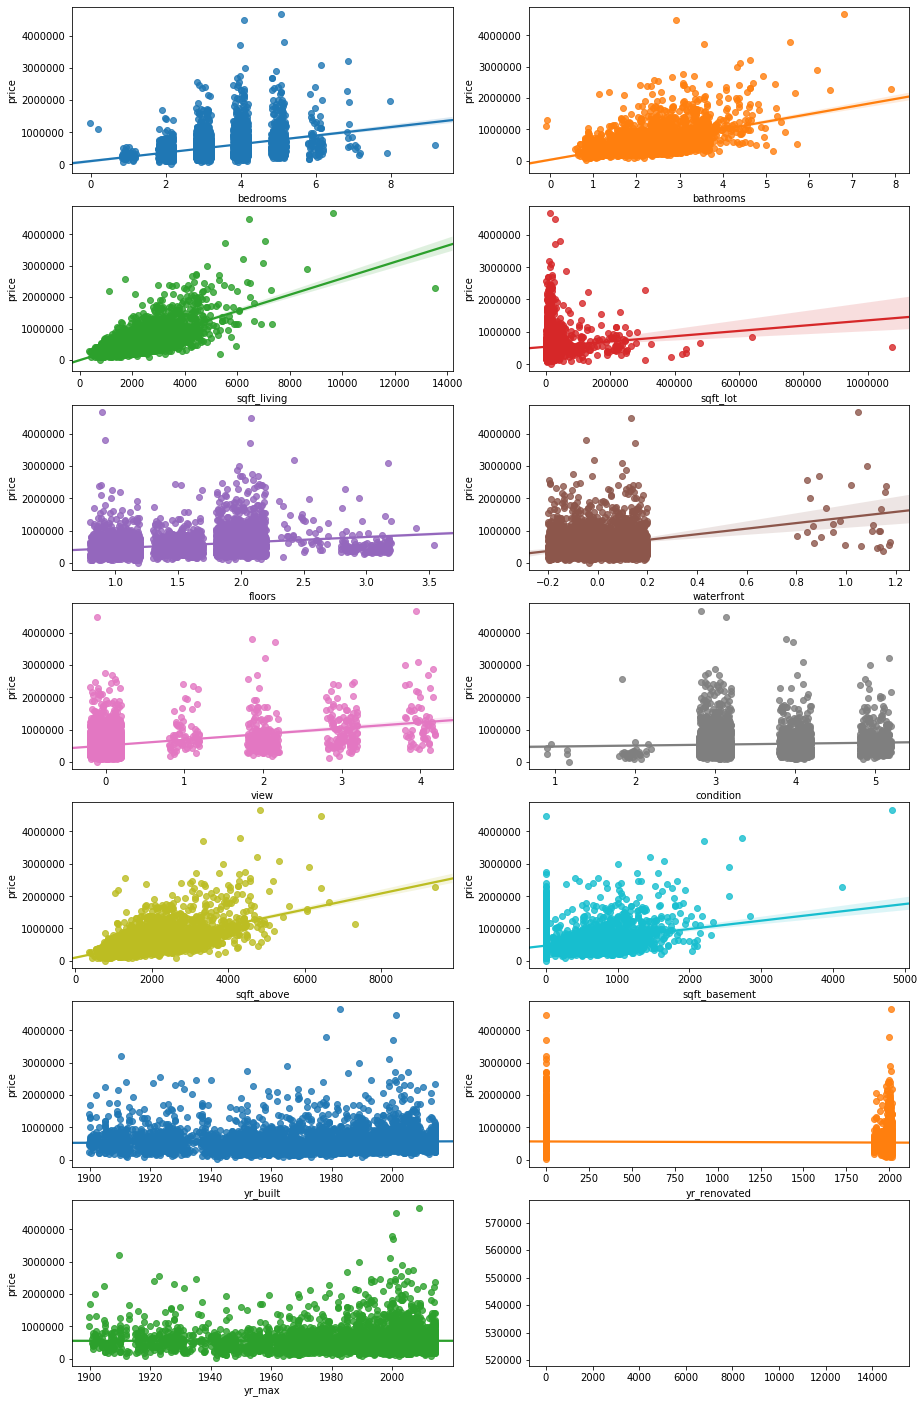

In [235]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,25)

fig, ax =  plt.subplots(7,2)
sns.regplot(df1.iloc[:,1], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[0, 0])
sns.regplot(df1.iloc[:,2], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[0, 1])
sns.regplot(df1.iloc[:,3], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[1, 0])
sns.regplot(df1.iloc[:,4], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[1, 1])
sns.regplot(df1.iloc[:,5], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[2, 0])
sns.regplot(df1.iloc[:,6], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[2, 1])
sns.regplot(df1.iloc[:,7], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[3, 0])
sns.regplot(df1.iloc[:,8], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[3, 1])
sns.regplot(df1.iloc[:,9], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[4, 0])
sns.regplot(df1.iloc[:,10], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[4, 1])
sns.regplot(df1.iloc[:,11], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[5, 0])
sns.regplot(df1.iloc[:,12], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[5, 1])
sns.regplot(df1.loc[:,'yr_max'], df1.iloc[:,0], x_jitter = 0.2, y_jitter = 0.2, ax = ax[6, 0])

### 2.4 Split data in training and test set. Do not use the test-set unless for a final evaluation in 2.5. Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help? Use the preprocessing that works best going forward.

There are no missing values in this dataset

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4548 entries, 0 to 4599
Data columns (total 16 columns):
price            4548 non-null float64
bedrooms         4548 non-null float64
bathrooms        4548 non-null float64
sqft_living      4548 non-null int64
sqft_lot         4548 non-null int64
floors           4548 non-null float64
waterfront       4548 non-null int64
view             4548 non-null int64
condition        4548 non-null int64
sqft_above       4548 non-null int64
sqft_basement    4548 non-null int64
yr_built         4548 non-null int64
yr_renovated     4548 non-null int64
city             4548 non-null object
statezip         4548 non-null object
yr_max           4548 non-null int64
dtypes: float64(4), int64(10), object(2)
memory usage: 604.0+ KB


In general, the scores we obtain for linear regression are very bad for both scaled and unscaled data. For the Ridge, LASSO, and ElasticNet we see that scaling is necessary (otherways the results are very low). Among these, we see a better performance for LASSO and Ridge while a worse performance for ElasticNet -- something that can obviously be solved chaning the default parameters, as by definition the ElasticNet can always perform at least as well as LASSO or Ridge.

In [237]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0])

categorical = X_train.dtypes == object

preprocess = make_column_transformer(
    (preprocessing.StandardScaler(), ~categorical),
    (preprocessing.OneHotEncoder(sparse = False, handle_unknown = 'ignore'), categorical))

preprocess2 = make_column_transformer(
    (preprocessing.OneHotEncoder(sparse = False, handle_unknown = 'ignore'), categorical))

#### Linear Regression

In [238]:
from sklearn.linear_model import LinearRegression

lrmodel = make_pipeline(preprocess, LinearRegression())
scores1 = cross_val_score(lrmodel, X_train, y_train, cv = 10)
print(np.mean(scores1))
lrmodel2 = make_pipeline(preprocess2, LinearRegression())
scores2 = cross_val_score(lrmodel2, X_train, y_train, cv = 10)
print(np.mean(scores2))

-1959729137991989.2
-7.267636143008358e+22


#### Ridge

In [239]:
from sklearn.linear_model import Ridge

ridgemodel = make_pipeline(preprocess, Ridge())
scores1 = cross_val_score(ridgemodel, X_train, y_train, cv = 10)
print(np.mean(scores1))
ridgemodel2 = make_pipeline(preprocess2, Ridge())
scores2 = cross_val_score(ridgemodel2, X_train, y_train, cv = 10)
print(np.mean(scores2))

0.7513910037413831
0.3953009264164033


#### LASSO

In [240]:
from sklearn.linear_model import Lasso

lassomodel = make_pipeline(preprocess, Lasso(precompute = True, max_iter  =  10000, tol  =  0.01)) # To ease convergence
scores1 = cross_val_score(lassomodel, X_train, y_train, cv = 10)
print(np.mean(scores1))
lassomodel2 = make_pipeline(preprocess2, Lasso(precompute = True, max_iter  =  10000, tol  =  0.01))
scores2 = cross_val_score(lassomodel2, X_train, y_train, cv = 10)
print(np.mean(scores2))

0.744884634106401
0.3873480927400406


#### ElasticNet

In [241]:
from sklearn.linear_model import ElasticNet

enmdoel = make_pipeline(preprocess, ElasticNet())
scores1 = cross_val_score(enmdoel, X_train, y_train, cv = 10)
print(np.mean(scores1))
enmdoel2 = make_pipeline(preprocess2, ElasticNet())
scores2 = cross_val_score(enmdoel2, X_train, y_train, cv = 10)
print(np.mean(scores2))

0.5732441996111491
0.044547011918696075


### 2.5 Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet

The results improve slightly, but in general we see the performance is very similar. This does not mean, however, that grid search is not useful. If we had taken different preprocessing steps the sklearn defaults for hyperparameters may have produced poor results relative to the ones obtained by grid search.

In [242]:
from sklearn.model_selection import GridSearchCV

def plot_grid(grid, log = True):
    grid_results = pd.DataFrame(grid.cv_results_).loc[:, ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
    grid_results['params'] = [list(dictionary.values())[0] for dictionary in grid_results.params]
    grid_results = grid_results.set_index('params')

    fig, ax = plt.subplots()
    ax.plot(grid_results.index, grid_results.mean_test_score, '.-', label='Test')
    ax.plot(grid_results.index, grid_results.mean_train_score, '.-', label='Train')
    if log == True:
        ax.set_xscale('log')
    ax.fill_between(grid_results.index, grid_results.mean_test_score - grid_results.std_test_score, grid_results.mean_test_score + grid_results.std_test_score, facecolor='blue', alpha=0.1)
    ax.fill_between(grid_results.index, grid_results.mean_train_score - grid_results.std_train_score, grid_results.mean_train_score + grid_results.std_train_score, facecolor='orange', alpha=0.2)
    ax.set_xlabel('Hyperparameter')
    ax.set_ylabel('Balanced Accuracy')
    plt.legend(loc='best')
    plt.show()

#### Ridge

In [243]:
param_grid = {'ridge__alpha':  np.concatenate((np.arange(0.1, 1, 0.25), np.arange(1, 10, 2), np.arange(10, 1000, 20)))}
grid = GridSearchCV(ridgemodel, cv = 10, 
                    param_grid = param_grid, return_train_score = True, refit = True)
grid.fit(X_train, y_train)

print("Mean cross-validation score of the best estimator: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test score: {:.3f}".format(grid.score(X_test, y_test)))

Mean cross-validation score of the best estimator: 0.754
Best parameters: {'ridge__alpha': 3.0}
Test score: 0.764


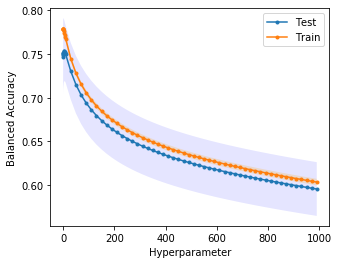

In [244]:
plt.rcParams["figure.figsize"] = (5,4)

plot_grid(grid, log = False)

#### LASSO

In [245]:
%%capture
# We use capture to avoid warnings of convergence when using little regularization
param_grid = {'lasso__alpha':  np.concatenate((np.arange(0.1, 1, 0.25), np.arange(1, 10, 1), np.arange(10, 1000, 20)))}
grid = GridSearchCV(lassomodel, cv = 10, 
                    param_grid = param_grid, return_train_score = True, refit = True)
grid.fit(X_train, y_train)

In [246]:
print("Mean cross-validation score of the best estimator: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test score: {:.3f}".format(grid.score(X_test, y_test)))

Mean cross-validation score of the best estimator: 0.753
Best parameters: {'lasso__alpha': 250.0}
Test score: 0.761


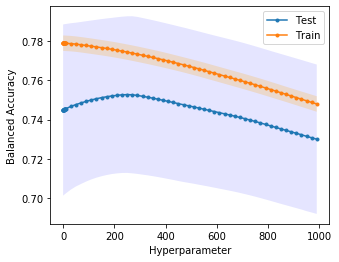

In [247]:
plot_grid(grid, log = False)

#### ElasticNet

In [248]:
%%capture
param_grid = {'elasticnet__alpha': np.arange(1, 201, 20), 'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}
engrid = GridSearchCV(enmdoel, cv = 10, 
                    param_grid = param_grid, return_train_score = True, refit = True)
engrid.fit(X_train, y_train)

In [249]:
print("Mean cross-validation score of the best estimator: {:.3f}".format(engrid.best_score_))
print("Best parameters: {}".format(engrid.best_params_))
print("Test score: {:.3f}".format(engrid.score(X_test, y_test)))

Mean cross-validation score of the best estimator: 0.752
Best parameters: {'elasticnet__alpha': 181, 'elasticnet__l1_ratio': 1.0}
Test score: 0.762


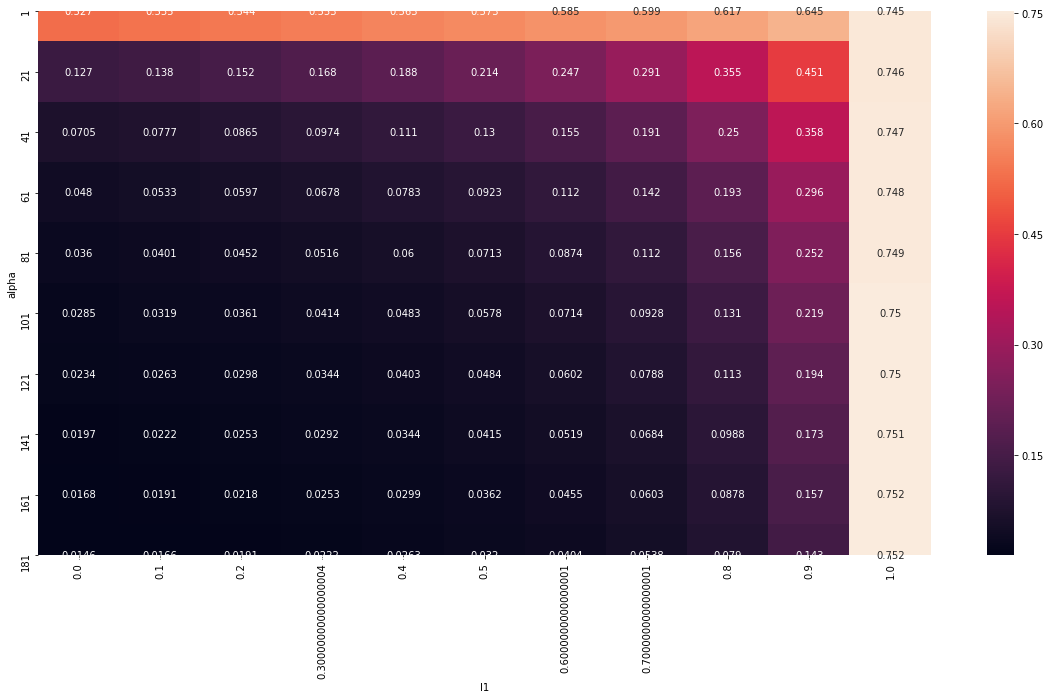

In [250]:
plt.rcParams["figure.figsize"] = (20,10)

grid_results = pd.DataFrame(engrid.cv_results_).loc[:, ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
grid_results['alpha'] = [list(dictionary.values())[0] for dictionary in grid_results.params]
grid_results['l1'] = [list(dictionary.values())[1] for dictionary in grid_results.params]
res = pd.pivot_table(grid_results, values='mean_test_score', index='alpha', columns='l1')

sns.heatmap(res, annot=True, fmt=".3g")

Probably due to the large number of variables the best model favors LASSO (i.e. L1  = 1 means only LASSO regularization) that shrinks the coefficients of some highly-correlated variables to zero. This is also the reason a relatively high regularization gives better results.

### 2.6 Visualize the 20 most important coefficients of the resulting models. Do they agree on which features are important?

Location explains a lot in housing pricing, something that is clearly reflecte in the model. Houses in Medina and Clyde Hill, which are two of the richest neighbours in Seattle, are much more expensive than houses in other places. Note that there is only one variable that refelcts characteristics of the house not related to its location: sqft_living. This makes sense, as houses with bigger living space are obviously more expensive that smaller ones. 

In [251]:
names1 = list(X_train.select_dtypes(exclude = 'object').columns)
names2 = list(preprocessing.OneHotEncoder().fit(X_train.select_dtypes('object')).get_feature_names())
names = names1 + names2

coefs = pd.Series(engrid.best_estimator_[1].coef_, index = names)
greater_cofs_abs = coefs.abs().sort_values(ascending = False)[0:19]
greater_cofs = coefs.loc[greater_cofs_abs.index]

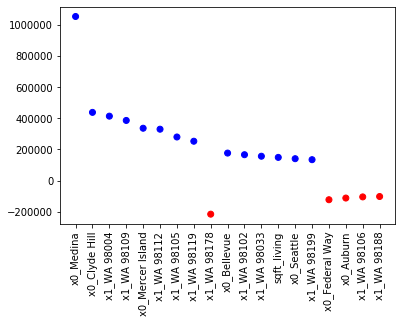

In [252]:
plt.rcParams["figure.figsize"] = (6,4)

plt.scatter(greater_cofs.index, greater_cofs, c = np.sign(greater_cofs), cmap="bwr_r")
plt.xticks(rotation=90)
plt.show()